In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import datset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train['data'] = 'train'
test['data'] = 'test'

In [4]:
all_data = pd.concat([train, test], axis=0)

In [5]:
all_data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported   data  
0       False  train  
1        True  train  
2       False  train  
3       False  train  
4        True  train

In [6]:
all_data.tail()

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck              Name  \
4272          0.0        0.0           0.0   0.0     0.0       Jeron Peter   
4273          0.0      847.0          17.0  10.0   144.0     Matty Scheron   
4274          0.0        0.0           0.0   0.0     0.0       Jayrin Pore   
4275          0.0     2680.0           0.0   0.0   523.0    Kitakan Conale   
4276          0.0        0.0           0.0   0.0     0.0  Lilace Leonzaley   

     Transported  data  
4272         NaN  test  
4273         NaN  test  
4274         NaN  test  
4275         NaN  test  
4276         NaN  test

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  data          12970 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.6+ MB


In [8]:
all_data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  12700.000000  12707.000000  12681.000000  12664.000000  12686.000000   
mean      28.771969    222.897852    451.961675    174.906033    308.476904   
std       14.387261    647.596664   1584.370747    590.558690   1130.279641   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.000000      0.000000      0.000000      0.000000      0.000000   
50%       27.000000      0.000000      0.000000      0.000000      0.000000   
75%       38.000000     49.000000     77.000000     29.000000     57.000000   
max       79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count  12702.000000  
mean     306.789482  
std     1180.097223  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       42.000000  
max    24133.000000

In [9]:
dups = all_data.duplicated()
print("Number of duplicated rows = %d" %(dups.sum()))
all_data[dups]

Number of duplicated rows = 0


Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, data]
Index: []

In [10]:
temp = []
for i in all_data.columns:
    col = all_data[i].isnull().sum()/ len(all_data)
    if col > 0.25:
        temp.append(i+"-"+str(col*100)+'%')
    else:
        pass

In [11]:
temp

['Transported-32.97609868928296%']

In [12]:
#1.Handling missing value
all_data.isnull().sum() / len(all_data)*100

PassengerId      0.000000
HomePlanet       2.220509
CryoSleep        2.390131
Cabin            2.305320
Destination      2.112567
Age              2.081727
VIP              2.282190
RoomService      2.027756
FoodCourt        2.228219
ShoppingMall     2.359291
Spa              2.189668
VRDeck           2.066307
Name             2.266769
Transported     32.976099
data             0.000000
dtype: float64

In [13]:
len(all_data)

12970

In [14]:
all_data['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [15]:
all_data['HomePlanet'] = all_data['HomePlanet'].fillna('Earth')

In [16]:
all_data['HomePlanet'].isnull().sum()

0

In [17]:
all_data['CryoSleep'].value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [18]:
all_data['CryoSleep'] = all_data['CryoSleep'].fillna(False)

In [19]:
all_data['CryoSleep'].isnull().sum()

0

In [20]:
all_data['Cabin'].value_counts()

G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64

In [21]:
all_data['Cabin'].isnull().sum()

299

In [22]:
all_data['Cabin_deck'] = all_data['Cabin'].str[0]

In [23]:
all_data['Cabin_side'] = all_data['Cabin'].str[-1]

In [24]:
all_data.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported   data Cabin_deck Cabin_side  
0       False  train          B          P  
1        True  train          F          S  
2       False  train          A          S  
3       False  train          A          S  
4        True  train          F          S

In [25]:
all_data['Cabin_deck'].isnull().sum()

299

In [26]:
all_data['Cabin_deck'].value_counts()

F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Cabin_deck, dtype: int64

In [27]:
all_data['Cabin_side'].value_counts()

S    6381
P    6290
Name: Cabin_side, dtype: int64

In [28]:
all_data['Cabin_deck'] = all_data['Cabin_deck'].fillna('F')
all_data['Cabin_side'] = all_data['Cabin_side'].fillna('S')

In [29]:
print(all_data['Cabin_deck'].isnull().sum(), all_data['Cabin_side'].isnull().sum())

0 0


In [30]:
all_data = all_data.drop(['Cabin'], axis=1)

In [31]:
all_data.shape

(12970, 16)

In [32]:
all_data.head()

PassengerId HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa      False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth      False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa      False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa      False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth      False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name Transported  \
0        0.0           0.0     0.0     0.0    Maham Ofracculy       False   
1        9.0          25.0   549.0    44.0       Juanna Vines        True   
2     3576.0           0.0  6715.0    49.0      Altark Susent       False   
3     1283.0         371.0  3329.0   193.0       Solam Susent       False   
4       70.0         151.0   565.0     2.0  Willy Santantines        True   

    data Cabin_deck Cabin_side  
0  train          B          P  
1  train          F          S  
2  train          A          S  
3  train          A          S  
4  train          F          S

In [33]:
all_data.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
data               0
Cabin_deck         0
Cabin_side         0
dtype: int64

In [34]:
all_data['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [35]:
all_data['Destination'] = all_data['Destination'].fillna('TRAPPIST-1e')

In [36]:
all_data['Destination'].isnull().sum()

0

In [37]:
all_data['Age'].value_counts()

18.0    496
24.0    482
21.0    468
19.0    455
22.0    454
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: Age, Length: 80, dtype: int64

<AxesSubplot: ylabel='Age'>

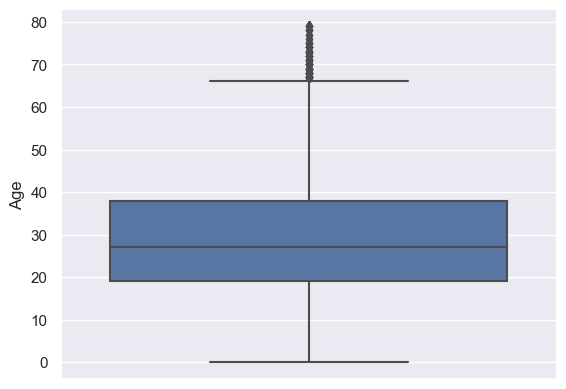

In [38]:
sns.boxplot(y='Age', data=all_data)

In [39]:
print(all_data['Age'].mean(),all_data['Age'].median())

28.771968503937007 27.0


In [40]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [41]:
all_data['Age'].isnull().sum()

0

In [42]:
all_data.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
data               0
Cabin_deck         0
Cabin_side         0
dtype: int64

In [43]:
all_data['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [44]:
all_data['VIP'] = all_data['VIP'].fillna(False)

In [45]:
all_data['RoomService'].value_counts()

0.0       8303
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: RoomService, Length: 1578, dtype: int64

<AxesSubplot: ylabel='RoomService'>

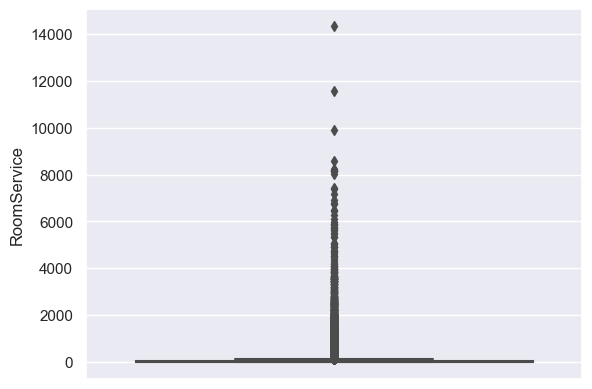

In [46]:
sns.boxplot(y='RoomService', data=all_data)

In [47]:
all_data = all_data.drop(['RoomService'], axis=1)

In [48]:
all_data.shape

(12970, 15)

In [49]:
all_data.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
data               0
Cabin_deck         0
Cabin_side         0
dtype: int64

In [50]:
all_data['FoodCourt'].value_counts()

0.0        8146
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: FoodCourt, Length: 1953, dtype: int64

<AxesSubplot: ylabel='FoodCourt'>

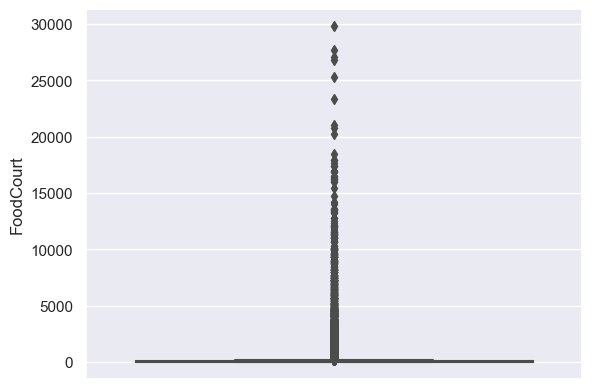

In [51]:
sns.boxplot(y='FoodCourt', data=all_data)

<AxesSubplot: ylabel='ShoppingMall'>

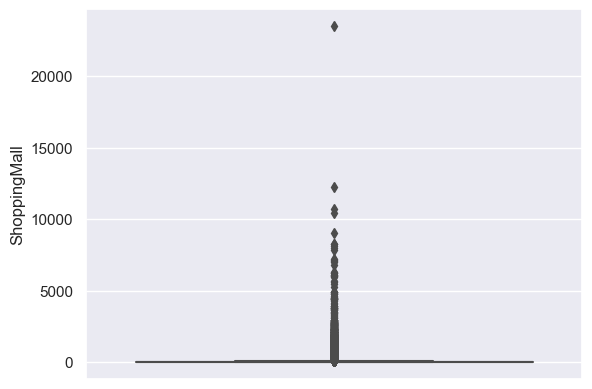

In [52]:
sns.boxplot(y='ShoppingMall', data=all_data)

<AxesSubplot: ylabel='Spa'>

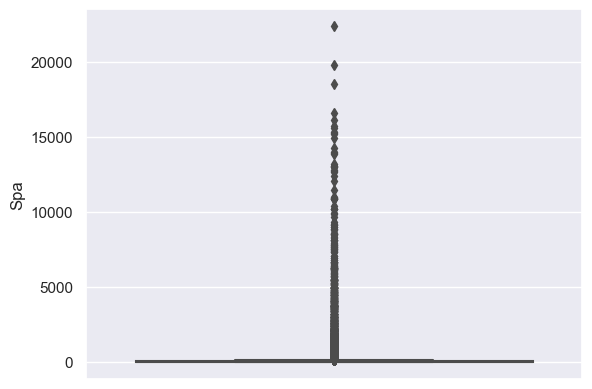

In [53]:
sns.boxplot(y='Spa', data=all_data)

<AxesSubplot: ylabel='VRDeck'>

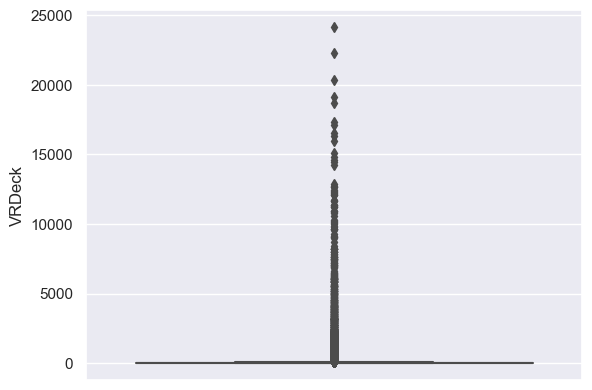

In [54]:
sns.boxplot(y='VRDeck', data=all_data)

In [55]:
all_data = all_data.drop(['FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)

In [56]:
all_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
Name            294
Transported    4277
data              0
Cabin_deck        0
Cabin_side        0
dtype: int64

In [57]:
all_data = all_data.drop(['Name'],axis=1)

In [58]:
all_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
Transported    4277
data              0
Cabin_deck        0
Cabin_side        0
dtype: int64

In [59]:
all_data.head()

PassengerId HomePlanet  CryoSleep  Destination   Age    VIP Transported  \
0     0001_01     Europa      False  TRAPPIST-1e  39.0  False       False   
1     0002_01      Earth      False  TRAPPIST-1e  24.0  False        True   
2     0003_01     Europa      False  TRAPPIST-1e  58.0   True       False   
3     0003_02     Europa      False  TRAPPIST-1e  33.0  False       False   
4     0004_01      Earth      False  TRAPPIST-1e  16.0  False        True   

    data Cabin_deck Cabin_side  
0  train          B          P  
1  train          F          S  
2  train          A          S  
3  train          A          S  
4  train          F          S

In [60]:
all_data.shape

(12970, 10)

In [61]:
#2. outlier - No outlier and in logistic regression outlier treatment not required

In [62]:
#3. Encoding part

In [63]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  12970 non-null  object 
 1   HomePlanet   12970 non-null  object 
 2   CryoSleep    12970 non-null  bool   
 3   Destination  12970 non-null  object 
 4   Age          12970 non-null  float64
 5   VIP          12970 non-null  bool   
 6   Transported  8693 non-null   object 
 7   data         12970 non-null  object 
 8   Cabin_deck   12970 non-null  object 
 9   Cabin_side   12970 non-null  object 
dtypes: bool(2), float64(1), object(7)
memory usage: 937.3+ KB


In [64]:
for i in all_data.columns:
    print("****************************************************", i , 
          "*****************************************************************")
    print()
    print(set(all_data[i].tolist()))
    print()
    

**************************************************** PassengerId *****************************************************************

{'1496_01', '2442_01', '4953_01', '4706_02', '5762_01', '6088_01', '7565_02', '3893_02', '5156_02', '0508_01', '2160_01', '1325_01', '8206_01', '8066_01', '2815_03', '6051_01', '2436_01', '4663_03', '1211_05', '6798_01', '6701_01', '7921_01', '2372_01', '5112_01', '6218_02', '0556_01', '1989_01', '6137_03', '4701_02', '8686_01', '2974_01', '6651_01', '4548_01', '6652_01', '1814_01', '8960_01', '2302_01', '2254_01', '3297_01', '0882_01', '4372_01', '2555_01', '4569_02', '2991_01', '3198_01', '4455_03', '1816_02', '8344_02', '5337_01', '8204_01', '8254_01', '9077_01', '2405_01', '1056_01', '1732_01', '3575_01', '8011_01', '4098_01', '3951_01', '3786_02', '4572_01', '0276_02', '3266_01', '3018_01', '5945_02', '7249_02', '8685_01', '7269_01', '5584_02', '3886_01', '6302_06', '6563_02', '6601_01', '4782_05', '4823_01', '5163_02', '3829_02', '7003_01', '6137_01'

In [65]:
dummies = pd.get_dummies(all_data[['HomePlanet','CryoSleep','Destination','VIP','Cabin_deck','Cabin_side']],
                        columns = ['HomePlanet','CryoSleep','Destination','VIP','Cabin_deck','Cabin_side'], 
                        prefix = ['HomePlanet','CryoSleep','Destination','VIP','Cabin_deck','Cabin_side'],
                        drop_first=True)

In [66]:
dummies.head()

HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
0                  1                0               0   
1                  0                0               0   
2                  1                0               0   
3                  1                0               0   
4                  0                0               0   

   Destination_PSO J318.5-22  Destination_TRAPPIST-1e  VIP_True  Cabin_deck_B  \
0                          0                        1         0             1   
1                          0                        1         0             0   
2                          0                        1         1             0   
3                          0                        1         0             0   
4                          0                        1         0             0   

   Cabin_deck_C  Cabin_deck_D  Cabin_deck_E  Cabin_deck_F  Cabin_deck_G  \
0             0             0             0             0             0   
1             0             0             0             1             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             1             0   

   Cabin_deck_T  Cabin_side_S  
0             0             0  
1             0             1  
2             0             1  
3             0             1  
4             0             1

In [67]:
all_data.head()

PassengerId HomePlanet  CryoSleep  Destination   Age    VIP Transported  \
0     0001_01     Europa      False  TRAPPIST-1e  39.0  False       False   
1     0002_01      Earth      False  TRAPPIST-1e  24.0  False        True   
2     0003_01     Europa      False  TRAPPIST-1e  58.0   True       False   
3     0003_02     Europa      False  TRAPPIST-1e  33.0  False       False   
4     0004_01      Earth      False  TRAPPIST-1e  16.0  False        True   

    data Cabin_deck Cabin_side  
0  train          B          P  
1  train          F          S  
2  train          A          S  
3  train          A          S  
4  train          F          S

In [68]:
# 4. Feature scaling is not required.

In [69]:
all_data = all_data.drop(['HomePlanet','CryoSleep','Destination','VIP','Cabin_deck','Cabin_side'], axis=1)

In [70]:
all_data.head()

PassengerId   Age Transported   data
0     0001_01  39.0       False  train
1     0002_01  24.0        True  train
2     0003_01  58.0       False  train
3     0003_02  33.0       False  train
4     0004_01  16.0        True  train

In [71]:
final_df = pd.concat([all_data, dummies], axis=1)

In [72]:
final_df.shape

(12970, 18)

In [73]:
final_df.head()

PassengerId   Age Transported   data  HomePlanet_Europa  HomePlanet_Mars  \
0     0001_01  39.0       False  train                  1                0   
1     0002_01  24.0        True  train                  0                0   
2     0003_01  58.0       False  train                  1                0   
3     0003_02  33.0       False  train                  1                0   
4     0004_01  16.0        True  train                  0                0   

   CryoSleep_True  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  \
0               0                          0                        1   
1               0                          0                        1   
2               0                          0                        1   
3               0                          0                        1   
4               0                          0                        1   

   VIP_True  Cabin_deck_B  Cabin_deck_C  Cabin_deck_D  Cabin_deck_E  \
0         0             1             0             0             0   
1         0             0             0             0             0   
2         1             0             0             0             0   
3         0             0             0             0             0   
4         0             0             0             0             0   

   Cabin_deck_F  Cabin_deck_G  Cabin_deck_T  Cabin_side_S  
0             0             0             0             0  
1             1             0             0             1  
2             0             0             0             1  
3             0             0             0             1  
4             1             0             0             1

In [74]:
final_df_2 = final_df.drop(['PassengerId','Cabin_deck_B','Cabin_deck_C','Cabin_deck_D','Cabin_deck_E','Cabin_deck_F','Cabin_deck_G','Cabin_deck_T','Cabin_side_S'],axis=1)

In [75]:
final_df_2.head()

Age Transported   data  HomePlanet_Europa  HomePlanet_Mars  \
0  39.0       False  train                  1                0   
1  24.0        True  train                  0                0   
2  58.0       False  train                  1                0   
3  33.0       False  train                  1                0   
4  16.0        True  train                  0                0   

   CryoSleep_True  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  \
0               0                          0                        1   
1               0                          0                        1   
2               0                          0                        1   
3               0                          0                        1   
4               0                          0                        1   

   VIP_True  
0         0  
1         0  
2         1  
3         0  
4         0

In [76]:
final_df_2.shape

(12970, 9)

In [77]:
final_df_2.head()

Age Transported   data  HomePlanet_Europa  HomePlanet_Mars  \
0  39.0       False  train                  1                0   
1  24.0        True  train                  0                0   
2  58.0       False  train                  1                0   
3  33.0       False  train                  1                0   
4  16.0        True  train                  0                0   

   CryoSleep_True  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  \
0               0                          0                        1   
1               0                          0                        1   
2               0                          0                        1   
3               0                          0                        1   
4               0                          0                        1   

   VIP_True  
0         0  
1         0  
2         1  
3         0  
4         0

In [78]:
# Label encoder
final_df_2['Transported'] = final_df_2['Transported'].astype('category')
final_df_2['Transported'] = final_df_2['Transported'].cat.codes

In [79]:
final_df_2.head()

Age  Transported   data  HomePlanet_Europa  HomePlanet_Mars  \
0  39.0            0  train                  1                0   
1  24.0            1  train                  0                0   
2  58.0            0  train                  1                0   
3  33.0            0  train                  1                0   
4  16.0            1  train                  0                0   

   CryoSleep_True  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  \
0               0                          0                        1   
1               0                          0                        1   
2               0                          0                        1   
3               0                          0                        1   
4               0                          0                        1   

   VIP_True  
0         0  
1         0  
2         1  
3         0  
4         0

# Exploratory data analysis - EDA

In [80]:
# def distplots(col):
#     sns.distplot(all_data[col])
#     plt.show()
    
# for i in list(all_data.select_dtypes(exclude=['object']).columns):
#     distplots(i)

In [81]:
# plt.figure(figsize=(15,12))
# cmap = sns.light_palette("#3fdd01", as_cmap=True)
# map = sns.heatmap(final_df.corr(),annot=True,cmap=cmap)

In [82]:
# sns.pairplot(final_df)

In [83]:
# from ydata_profiling import ProfileReport
# report = ProfileReport(final_df)
# report.to_file(output_file='output2.html')

In [84]:
final_df_2.to_csv('final_df')

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  data          8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [86]:
final_df_3 = final_df_2.drop(['Destination_PSO J318.5-22'], axis=1)

In [87]:
final_df_3.head()

Age  Transported   data  HomePlanet_Europa  HomePlanet_Mars  \
0  39.0            0  train                  1                0   
1  24.0            1  train                  0                0   
2  58.0            0  train                  1                0   
3  33.0            0  train                  1                0   
4  16.0            1  train                  0                0   

   CryoSleep_True  Destination_TRAPPIST-1e  VIP_True  
0               0                        1         0  
1               0                        1         0  
2               0                        1         1  
3               0                        1         0  
4               0                        1         0

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [89]:
final_df_4 = final_df_3.copy()

In [90]:
final_df_4['Age'] = scaler.fit_transform(final_df_4[['Age']])

In [91]:
final_df_4.head()

Age  Transported   data  HomePlanet_Europa  HomePlanet_Mars  \
0  0.720932            0  train                  1                0   
1 -0.332557            1  train                  0                0   
2  2.055350            0  train                  1                0   
3  0.299536            0  train                  1                0   
4 -0.894417            1  train                  0                0   

   CryoSleep_True  Destination_TRAPPIST-1e  VIP_True  
0               0                        1         0  
1               0                        1         0  
2               0                        1         1  
3               0                        1         0  
4               0                        1         0

In [92]:
final_df_4.to_csv('final_df')
final_df_5 = final_df_4.copy()

In [93]:
#separate training and test data
train = final_df_5[final_df_5['data']=='train']
test = final_df_5[final_df_5['data']=='test']

In [94]:
train = train.drop(['data'], axis=1)
test = test.drop(['data'], axis=1)

In [95]:
#split the data into independent and dependent variable
x = train.drop(['Transported'], axis=1)
y = train['Transported']

In [96]:
x1 = test.drop(['Transported'], axis=1)
y1 = test['Transported']

In [97]:
x1.head()

Age  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
0 -0.121859                  0                0               1   
1 -0.683720                  0                0               0   
2  0.159071                  1                0               1   
3  0.650699                  1                0               0   
4 -0.613487                  0                0               0   

   Destination_TRAPPIST-1e  VIP_True  
0                        1         0  
1                        1         0  
2                        0         0  
3                        1         0  
4                        1         0

In [98]:
x.head()

Age  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
0  0.720932                  1                0               0   
1 -0.332557                  0                0               0   
2  2.055350                  1                0               0   
3  0.299536                  1                0               0   
4 -0.894417                  0                0               0   

   Destination_TRAPPIST-1e  VIP_True  
0                        1         0  
1                        1         0  
2                        1         1  
3                        1         0  
4                        1         0

In [99]:
#split the data into training and testing
# Training for building a model and test for predicting the model performance
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train, y_train)
dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [102]:
#Predict

y_pred_dt1_train = dt1.predict(x_train)
y_pred_dt1_test = dt1.predict(x_test)

y_pred_dt2_train = dt2.predict(x_train)
y_pred_dt2_test = dt2.predict(x_test)

In [103]:
# Evaluate the model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [104]:
print(classification_report(y_train, y_pred_dt1_train))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78      3464
           1       0.83      0.66      0.73      3490

    accuracy                           0.76      6954
   macro avg       0.77      0.76      0.76      6954
weighted avg       0.77      0.76      0.76      6954



In [105]:
print(classification_report(y_test, y_pred_dt1_test))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       851
           1       0.79      0.64      0.71       888

    accuracy                           0.73      1739
   macro avg       0.74      0.73      0.73      1739
weighted avg       0.74      0.73      0.73      1739



In [106]:
print("Train Accuracy", accuracy_score(y_train, y_pred_dt1_train))
print("*********************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_dt1_test))

Train Accuracy 0.7588438308886971
*********************************************************************************************************
Test Accuracy 0.7303047728579644


In [107]:
print("Train Accuracy", accuracy_score(y_train, y_pred_dt2_train))
print("*********************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_dt2_test))

Train Accuracy 0.7588438308886971
*********************************************************************************************************
Test Accuracy 0.7303047728579644


In [ ]:
# Post-prunning 

In [108]:
dt1.feature_importances_

array([0.26214807, 0.07144855, 0.05868445, 0.57482849, 0.02141284,
       0.0114776 ])

In [109]:
pd.DataFrame(index=x.columns, data= dt1.feature_importances_, columns=['Feature Importance'])

Feature Importance
Age                                0.262148
HomePlanet_Europa                  0.071449
HomePlanet_Mars                    0.058684
CryoSleep_True                     0.574828
Destination_TRAPPIST-1e            0.021413
VIP_True                           0.011478

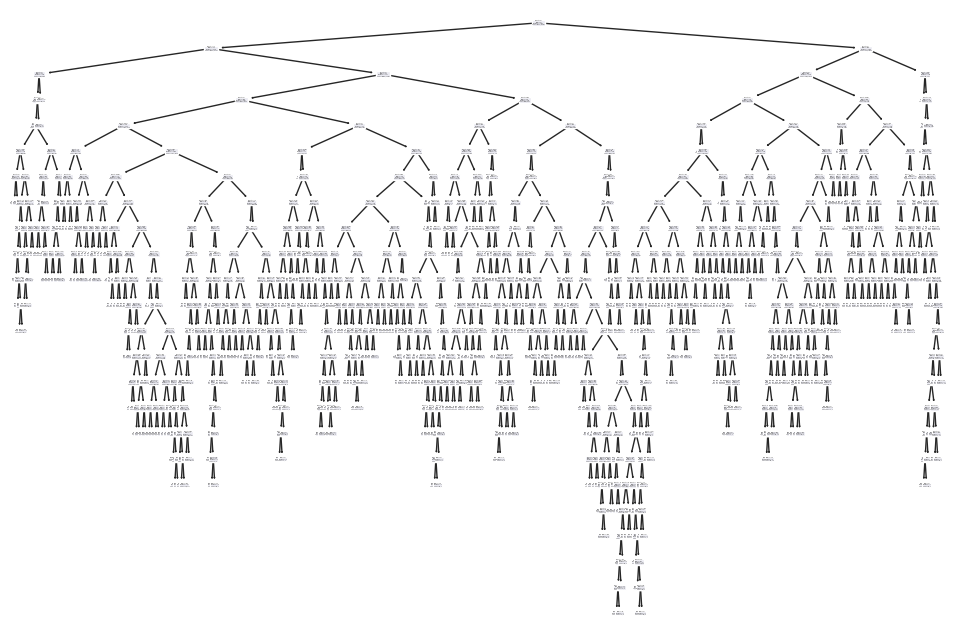

In [110]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt1)
plt.show()

In [ ]:
# plt.figure(figsize=(12,8), dpi=150)
# plot_tree(dt2, feature_names=x.columns, filled=True)
# plt.show()

In [111]:
# Use define function
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi=150)
    plot_tree(dt2, feature_names=x.columns, filled=True)

In [129]:
# HyperParameter in DecisionTree
prunned_tree = DecisionTreeClassifier(max_depth=3)
prunned_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       851
           1       0.81      0.66      0.73       888

    accuracy                           0.75      1739
   macro avg       0.76      0.75      0.75      1739
weighted avg       0.76      0.75      0.75      1739





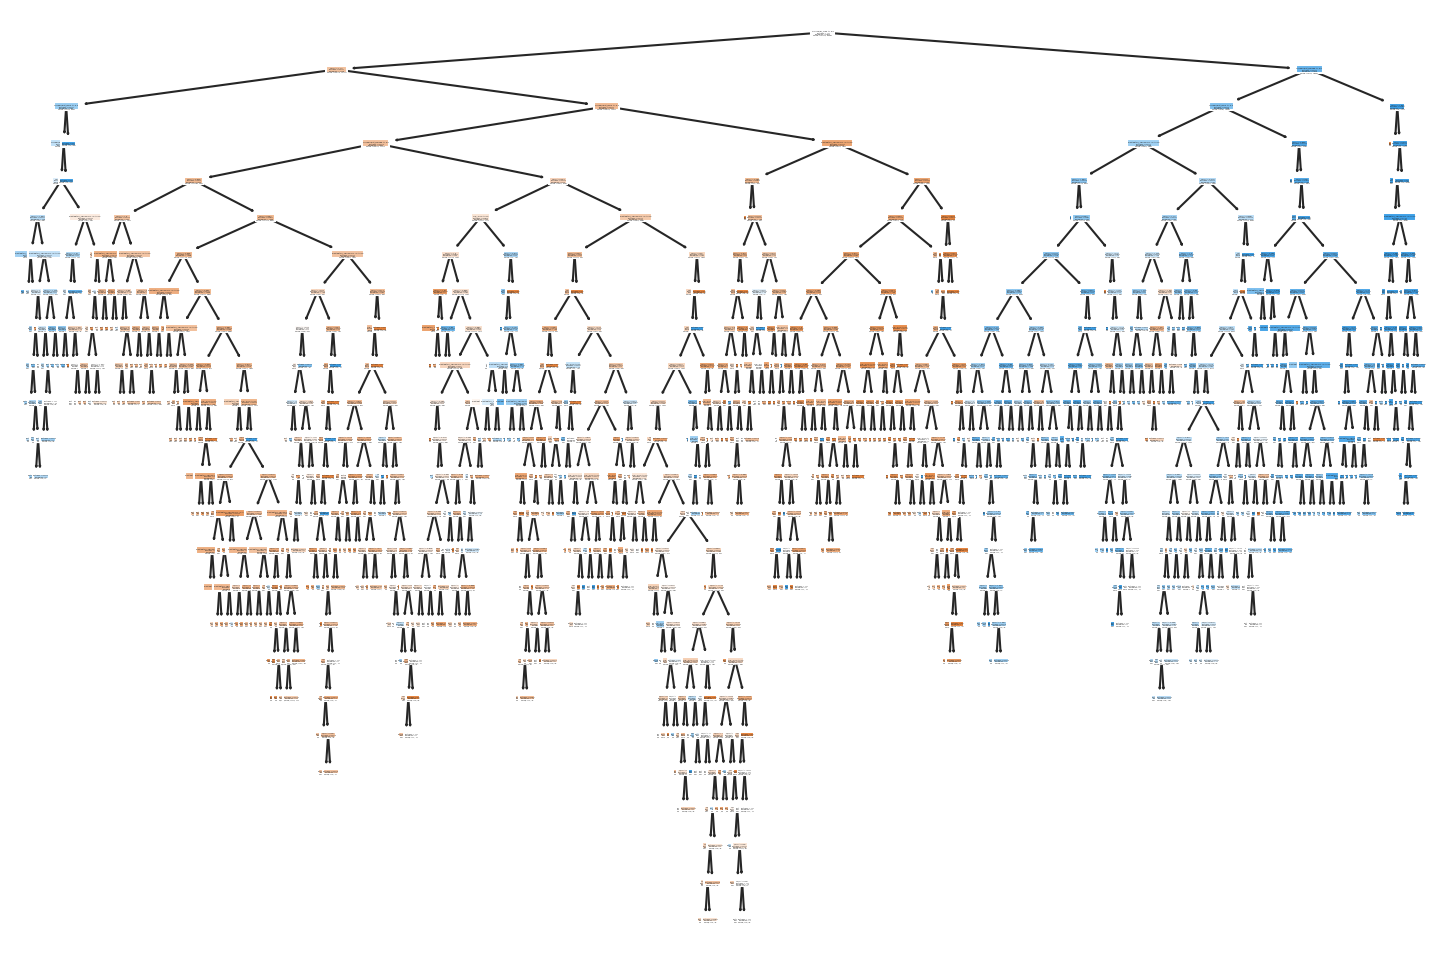

In [113]:
report_model(prunned_tree)

In [130]:
y_pred_dt_train = prunned_tree.predict(x_train)
y_pred_dt_test = prunned_tree.predict(x_test)

In [131]:
print("Train Accuracy", accuracy_score(y_train, y_pred_dt_train))
print("*********************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_dt_test))

Train Accuracy 0.7331032499280989
*********************************************************************************************************
Test Accuracy 0.7487061529614721


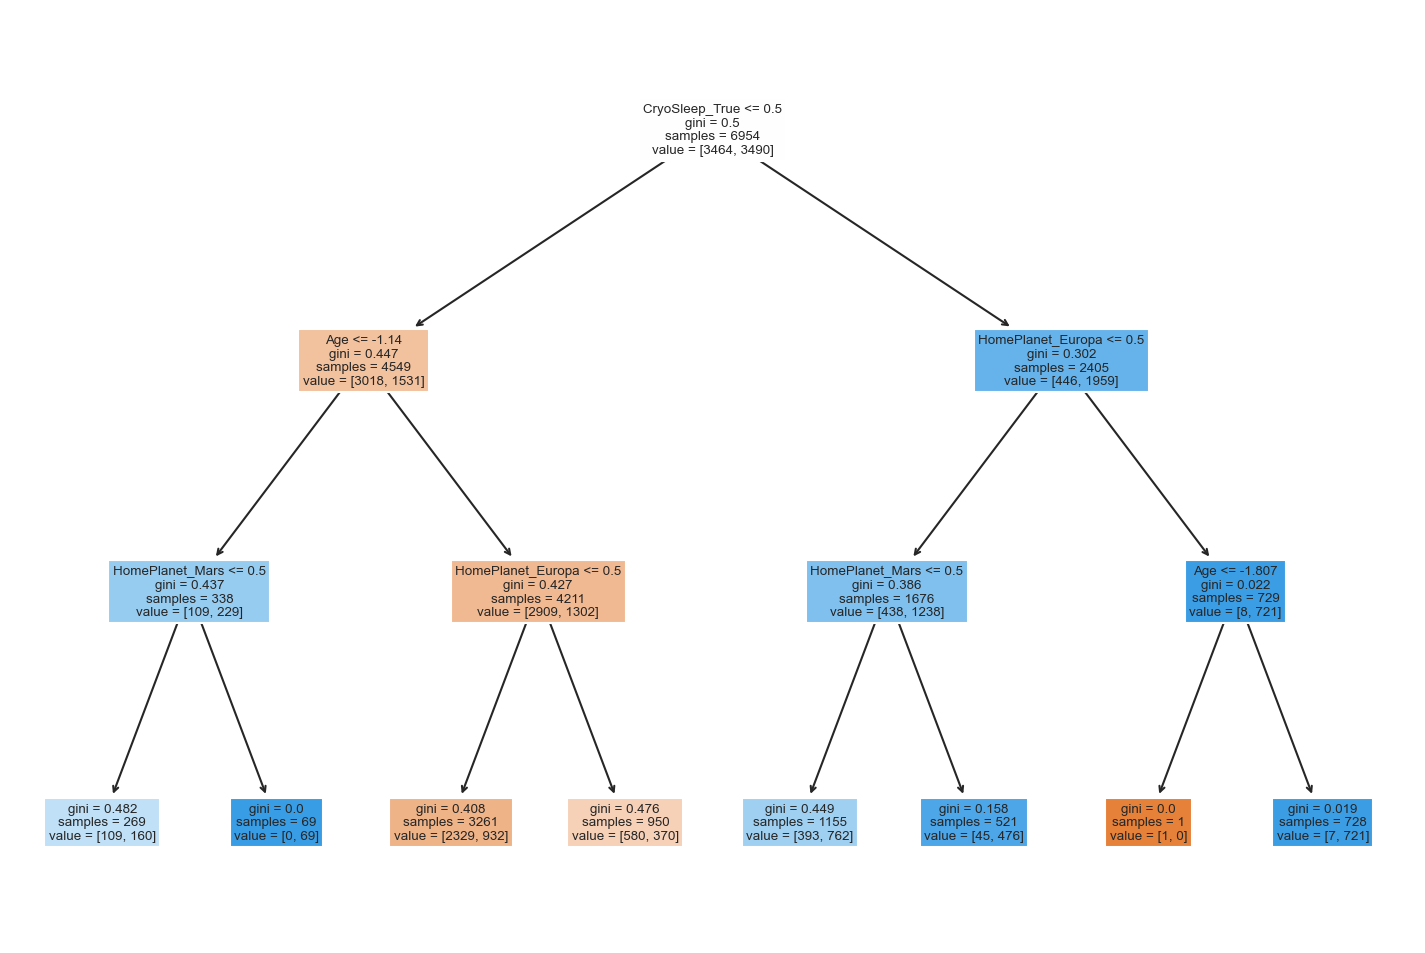

In [132]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(prunned_tree, feature_names=x.columns, filled=True)
plt.show()

In [133]:
# RandomForest and Bagging method
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [134]:
bag = BaggingClassifier()
bag.fit(x_train, y_train)

BaggingClassifier()

In [135]:
y_pred_bag_train = bag.predict(x_train)
y_pred_bag_test = bag.predict(x_test)

In [136]:
print("Train Accuracy", accuracy_score(y_train, y_pred_bag_train))
print("*********************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_bag_test))

Train Accuracy 0.7572620074777107
*********************************************************************************************************
Test Accuracy 0.7274295572167913


In [137]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=2,oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, oob_score=True)

In [138]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [139]:
print("Train Accuracy", accuracy_score(y_train, y_pred_rf_train))
print("*********************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_rf_test))

Train Accuracy 0.7313776243888409
*********************************************************************************************************
Test Accuracy 0.7446808510638298


# ROC-AUC

In [140]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_rf_test)
logistic_roc_auc

0.7470867606737172

In [141]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_test)

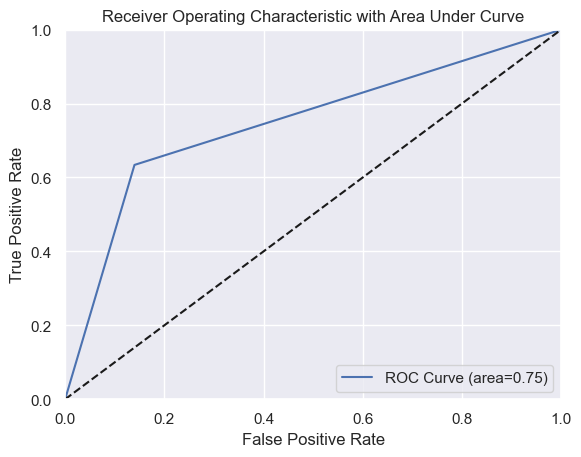

In [145]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

In [147]:
# Last part, we have to predict test data (whether customer will survived or not) where we don't have dv 
final_result = rf.predict(x1)

In [148]:
final_report = pd.concat([x1, pd.DataFrame(final_result)], axis=1)

In [149]:
final_report.head()

Age  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
0 -0.121859                  0                0               1   
1 -0.683720                  0                0               0   
2  0.159071                  1                0               1   
3  0.650699                  1                0               0   
4 -0.613487                  0                0               0   

   Destination_TRAPPIST-1e  VIP_True  0  
0                        1         0  1  
1                        1         0  0  
2                        0         0  1  
3                        1         0  0  
4                        1         0  0

In [150]:
final_report.rename(columns = {0: "Final_prediction"}, inplace=True)

In [151]:
final_report.head()

Age  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
0 -0.121859                  0                0               1   
1 -0.683720                  0                0               0   
2  0.159071                  1                0               1   
3  0.650699                  1                0               0   
4 -0.613487                  0                0               0   

   Destination_TRAPPIST-1e  VIP_True  Final_prediction  
0                        1         0                 1  
1                        1         0                 0  
2                        0         0                 1  
3                        1         0                 0  
4                        1         0                 0

In [154]:
submission = final_report.copy()

In [155]:
submission['Final_prediction'] = submission['Final_prediction'].map({0: 'False', 1: 'True'})

In [156]:
submission.head()

Age  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
0 -0.121859                  0                0               1   
1 -0.683720                  0                0               0   
2  0.159071                  1                0               1   
3  0.650699                  1                0               0   
4 -0.613487                  0                0               0   

   Destination_TRAPPIST-1e  VIP_True Final_prediction  
0                        1         0             True  
1                        1         0            False  
2                        0         0             True  
3                        1         0            False  
4                        1         0            False

In [157]:
df_1 = pd.read_csv('test.csv')

In [158]:
data1=pd.DataFrame(df_1.PassengerId)

In [159]:
df_2 = submission['Final_prediction']

In [160]:
submission=pd.concat([data1,df_2],axis=1)

In [161]:
submission.head()

PassengerId Final_prediction
0     0013_01             True
1     0018_01            False
2     0019_01             True
3     0021_01            False
4     0023_01            False

In [162]:
submission.rename(columns = {'Final_prediction': "Transported"}, inplace=True)

In [163]:
submission.to_csv('submission.csv',index=False)